In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import math
import json
import datetime
from scipy.spatial import ConvexHull
from shapely.geometry import Point, Polygon
from descartes.patch import PolygonPatch
import warnings
warnings.filterwarnings("ignore")
import Assistant_function

In [2]:
width = 1920
height = 1080

# load driving simulator data

In [3]:
Data_1 = pd.read_csv("Raw Data\Participant_6\experiment_1.txt", sep='#|,').replace(['\(','\)'], ['',''], regex=True)
Data_1.iloc[:,1:20] = Data_1.iloc[:,1:20].astype('float')
Data_1.iloc[:,25:-2] = Data_1.iloc[:,25:-2].astype('float')
Data_2 = pd.read_csv("Raw Data\Participant_6\experiment_2.txt", sep='#|,').replace(['\(','\)'], ['',''], regex=True)
Data_2.iloc[:,1:20] = Data_2.iloc[:,1:20].astype('float')
Data_2.iloc[:,25:-2] = Data_2.iloc[:,25:-2].astype('float')

In [4]:
# start when the subject stepping down the throttle
# end when the subject get out the exit
Start_time_index_1 = Data_1[Data_1.loc[:,"throttle"]>Data_1.loc[0,"throttle"]].index[0] 
End_time_index_1 = Data_1[Data_1.loc[:,"rest_area_dis"]==Data_1.loc[:,"rest_area_dis"].min()].index[0]
Data_1 = Data_1.loc[Start_time_index_1:End_time_index_1].reset_index(drop=True)
Start_time_index_2 = Data_2[Data_2.loc[:,"throttle"]>Data_2.loc[0,"throttle"]].index[0] 
End_time_index_2 = Data_2[Data_2.loc[:,"rest_area_dis"]==Data_2.loc[:,"rest_area_dis"].min()].index[0]
Data_2 = Data_2.loc[Start_time_index_2:End_time_index_2].reset_index(drop=True)

In [5]:
dt = Data_1.loc[0, "timestamp"][0:9]
Data_1["timestamp"] = Data_1["timestamp"].apply(lambda x: Assistant_function.to_timestampe(x))
Data_2["timestamp"] = Data_2["timestamp"].apply(lambda x: Assistant_function.to_timestampe(x))
start_time_1 = Data_1.loc[0,"timestamp"]
end_time_1 =  Data_1.loc[Data_1.shape[0]-1,"timestamp"]
print("The first experiment costed time: ", end_time_1 - start_time_1 )
start_time_2 = Data_2.loc[0,"timestamp"]
end_time_2 =  Data_2.loc[Data_2.shape[0]-1,"timestamp"]
print("The second experiment costed time: ", end_time_2 - start_time_2 )

The first experiment costed time:  0 days 00:01:27.789300
The second experiment costed time:  0 days 00:01:49.227100


In [6]:
Data_1.shape,Data_2.shape

((5269, 99), (6554, 99))

In [7]:
Col_FT_X = ['Follow_box_1X','Follow_box_2X','Follow_box_3X','Follow_box_4X',
            'Follow_box_5X','Follow_box_6X','Follow_box_7X','Follow_box_8X']
Col_FT_Y = ['Follow_box_1Y','Follow_box_2Y','Follow_box_3Y','Follow_box_4Y',
            'Follow_box_5Y','Follow_box_6Y','Follow_box_7Y','Follow_box_8Y']
Col_LT_X = ['Lead_box_1X','Lead_box_2X','Lead_box_3X','Lead_box_4X','Lead_box_5X','Lead_box_6X','Lead_box_7X','Lead_box_8X']
Col_LT_Y = ['Lead_box_1Y','Lead_box_2Y','Lead_box_3Y','Lead_box_4Y','Lead_box_5Y','Lead_box_6Y','Lead_box_7Y','Lead_box_8Y']
Col_FT_sign_X = ['Follow_sign_box_1X','Follow_sign_box_2X','Follow_sign_box_3X','Follow_sign_box_4X',
                 'Follow_sign_box_5X','Follow_sign_box_6X','Follow_sign_box_7X','Follow_sign_box_8X']
Col_FT_sign_Y = ['Follow_sign_box_1Y','Follow_sign_box_2Y','Follow_sign_box_3Y','Follow_sign_box_4Y',
                 'Follow_sign_box_5Y','Follow_sign_box_6Y','Follow_sign_box_7Y','Follow_sign_box_8Y']
Col_LT_sign_X = ['Lead_sign_box_1X','Lead_sign_box_2X','Lead_sign_box_3X','Lead_sign_box_4X',
                 'Lead_sign_box_5X','Lead_sign_box_6X','Lead_sign_box_7X','Lead_sign_box_8X']
Col_LT_sign_Y = ['Lead_sign_box_1Y','Lead_sign_box_2Y','Lead_sign_box_3Y','Lead_sign_box_4Y',
                 'Lead_sign_box_5Y','Lead_sign_box_6Y','Lead_sign_box_7Y','Lead_sign_box_8Y']

In [8]:
# change the height because the mask height is different to other objects y
Data_1[Col_FT_Y] = height - Data_1[Col_FT_Y] 
Data_1[Col_LT_Y] = height - Data_1[Col_LT_Y] 
Data_1[Col_FT_sign_Y] = height - Data_1[Col_FT_sign_Y] 
Data_1[Col_LT_sign_Y] = height - Data_1[Col_LT_sign_Y] 

Data_2[Col_FT_Y] = height - Data_2[Col_FT_Y] 
Data_2[Col_LT_Y] = height - Data_2[Col_LT_Y] 
Data_2[Col_FT_sign_Y] = height - Data_2[Col_FT_sign_Y] 
Data_2[Col_LT_sign_Y] = height - Data_2[Col_LT_sign_Y] 

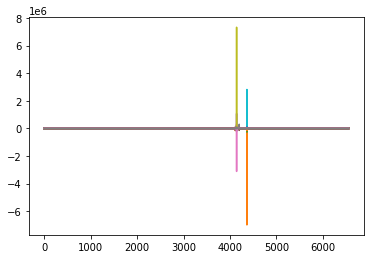

In [9]:
plt.plot(Data_2[Col_FT_X+Col_FT_Y+Col_LT_sign_X+Col_LT_sign_Y+Col_FT_sign_X+Col_FT_sign_Y])
plt.show()

In [10]:
Assistant_function.adjustdisplayxy(Data_2,Col_FT_X,Col_FT_Y)
Assistant_function.adjustdisplayxy(Data_2,Col_LT_X,Col_LT_Y)
Assistant_function.adjustdisplayxy(Data_2,Col_LT_sign_X,Col_LT_sign_Y)
Assistant_function.adjustdisplayxy(Data_2,Col_FT_sign_X,Col_FT_sign_Y)
Assistant_function.adjustdisplayxy(Data_1,Col_FT_X,Col_FT_Y)
Assistant_function.adjustdisplayxy(Data_1,Col_LT_X,Col_LT_Y)
Assistant_function.adjustdisplayxy(Data_1,Col_LT_sign_X,Col_LT_sign_Y)
Assistant_function.adjustdisplayxy(Data_1,Col_FT_sign_X,Col_FT_sign_Y)

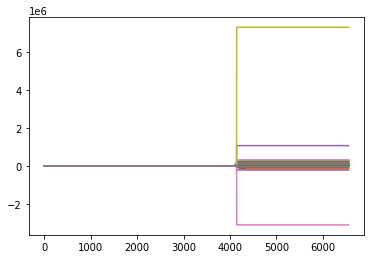

In [11]:
plt.plot(Data_2[Col_FT_X+Col_FT_Y+Col_LT_sign_X+Col_LT_sign_Y+Col_FT_sign_X+Col_FT_sign_Y])
plt.show()

In [12]:
Data_2[["FT_On_Disply","LT_On_Disply","LT_sign_On_Disply","FT_sign_On_Disply"]] = True
Data_1[["FT_On_Disply","LT_On_Disply","LT_sign_On_Disply","FT_sign_On_Disply"]] = True
Assistant_function.On_Disaplay(Data_2,Col_FT_X,Col_FT_Y,"FT_On_Disply",width,height)
Assistant_function.On_Disaplay(Data_2,Col_LT_X,Col_LT_Y,"LT_On_Disply",width,height)
Assistant_function.On_Disaplay(Data_2,Col_LT_sign_X,Col_LT_sign_Y,"LT_sign_On_Disply",width,height)
Assistant_function.On_Disaplay(Data_2,Col_FT_sign_X,Col_FT_sign_Y,"FT_sign_On_Disply",width,height)
Assistant_function.On_Disaplay(Data_1,Col_FT_X,Col_FT_Y,"FT_On_Disply",width,height)
Assistant_function.On_Disaplay(Data_1,Col_LT_X,Col_LT_Y,"LT_On_Disply",width,height)
Assistant_function.On_Disaplay(Data_1,Col_LT_sign_X,Col_LT_sign_Y,"LT_sign_On_Disply",width,height)
Assistant_function.On_Disaplay(Data_1,Col_FT_sign_X,Col_FT_sign_Y,"FT_sign_On_Disply",width,height)


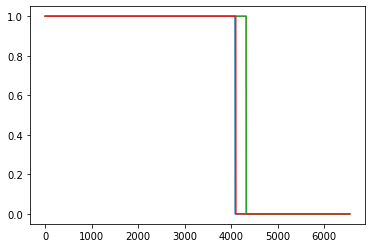

In [13]:
plt.plot(Data_2[["FT_On_Disply","LT_On_Disply","LT_sign_On_Disply","FT_sign_On_Disply"]])
plt.show()

In [14]:
# load eye tracker data

In [15]:
eye_data = pd.read_excel("Raw Data\Participant_6\Eye_tracker_Data_P6_0629.xlsx")

In [16]:
eye_data.shape

(21622, 102)

In [17]:
eye_data["Changing Lane"] = False
for cls,cle in zip(eye_data[eye_data.Event=="Start Change Lane"].index,eye_data[eye_data.Event=="End Change Lane"].index):
    eye_data.loc[cls:cle,"Changing Lane"] = True

In [18]:
eye_data.rename(columns={'AOI hit [Screen Recording Recording6 - Indicator Dashboard]': 'Indicator Dashboard',
                           'AOI hit [Screen Recording Recording6 - Left Mirror]': 'Left Mirror',
                           'AOI hit [Screen Recording Recording6 - Rear Mirror]': 'Rear Mirror',
                           'AOI hit [Screen Recording Recording6 - Right Mirror]': 'Right Mirror',
                           'AOI hit [Screen Recording Recording6 - Speed Dashboard]': 'Speed Dashboard',
                          }, inplace=True)

In [19]:
eye_data["timestamp"] = eye_data[['Recording timestamp','Recording start time']].apply(lambda x: Assistant_function.to_Date(x,dt), axis=1)
eye_data = eye_data[['timestamp','Sensor','Participant name','Event','Pupil diameter left', 'Pupil diameter right','Gaze point X','Gaze point Y',
                     'Eye movement type','Gaze event duration','Eye movement type index','Fixation point X','Fixation point Y',
                     'Indicator Dashboard', 'Left Mirror', 'Rear Mirror','Right Mirror', 'Speed Dashboard',"Changing Lane"]] # only keep relevant variables

In [20]:
# split and trim the data based on the start and end time extracted from driving simulator dataset
Start_time_index_1 = abs(eye_data["timestamp"] - start_time_1).idxmin()
End_time_index_1 = abs(eye_data["timestamp"] - end_time_1).idxmin()
eye_data_1 = eye_data.loc[Start_time_index_1:End_time_index_1].reset_index(drop=True)
Start_time_index_2 = abs(eye_data["timestamp"] - start_time_2).idxmin()
End_time_index_2 = abs(eye_data["timestamp"] - end_time_2).idxmin()
eye_data_2 = eye_data.loc[Start_time_index_2:End_time_index_2].reset_index(drop=True)

In [21]:
eye_data_1["Existing"] = False
for exit_s in eye_data_1[eye_data_1.Event=="Exiting"].index:
    eye_data_1.loc[exit_s:,"Existing"] = True
eye_data_2["Existing"] = False
for exit_s in eye_data_2[eye_data_2.Event=="Exiting"].index:
    eye_data_2.loc[exit_s:,"Existing"] = True

In [22]:
eye_data_1 = eye_data_1[eye_data_1['Sensor'] == "Eye Tracker"] 
eye_data_2 = eye_data_2[eye_data_2['Sensor'] == "Eye Tracker"] 

In [23]:
eye_data_1.shape,eye_data_2.shape

((5268, 20), (6554, 20))

In [24]:
eye_data_v = eye_data[eye_data['Sensor'] == "Eye Tracker"] 
p = round((eye_data_v.shape[0]-sum(eye_data_v['Gaze point X'].isna()))/eye_data_v.shape[0],2)
p_1 = round((eye_data_1.shape[0]-sum(eye_data_1['Gaze point X'].isna()))/eye_data_1.shape[0],2)
p_2 =round( (eye_data_2.shape[0]-sum(eye_data_2['Gaze point X'].isna()))/eye_data_2.shape[0],2)
print("valid sample percentage:", p,p_1,p_2)

valid sample percentage: 0.88 0.97 0.96


# COMBINE DATA 

In [25]:
df_DATA_1 = pd.merge_asof(Data_1, eye_data_1,on='timestamp',direction = 'nearest')
df_DATA_2 = pd.merge_asof(Data_2, eye_data_2,on='timestamp',direction = 'nearest')
df_DATA_1.drop(['Sensor'],inplace=True, axis=1)
df_DATA_1["Experiment"] = "less car"
df_DATA_2.drop(['Sensor'],inplace=True, axis=1)
df_DATA_2["Experiment"] = "more car"
df_DATA_1['Change_lane_by_rotY'] = abs((df_DATA_1['rotY']-df_DATA_1['rotY'].values[0]))>3
df_DATA_2['Change_lane_by_rotY'] = abs((df_DATA_2['rotY']-df_DATA_1['rotY'].values[0]))>3

In [26]:
df_DATA_1.shape,df_DATA_2.shape

((5269, 123), (6554, 123))

In [27]:
df_DATA_1.to_csv("Data/Experiment_1_Sub_6_0723.csv",index=False)
df_DATA_2.to_csv("Data/Experiment_2_Sub_6_0723.csv",index=False)